# box plot 

# Load library

In [55]:
library(ggplot2)
library(Hmisc)
source("./utilis/utilis.R")
library(glue)

# Set values & table names

In [56]:
threshold = 0.005
cutoff_column = 'padj'
data_df_path =  '../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA//one_wayANOVA_hMinImp_TICnorm_groupFil0.3_HILICpos_fullreport.csv'
meta_df_path =  '../../input/sequence_file/clean_deduplicated_meta_df.csv'
annot_df_path = '../../input/HILICpos_mzML/output_asari_project_223172519/Feature_annotation.tsv'

# Prepare the data

## Read and transform the data table and metadata table

In [57]:
df = read.csv(data_df_path, row.names = 1, sep = ',')
meta_df = read.csv(meta_df_path, row.names = 1)
annot_df = read.csv(annot_df_path, sep = '\t')

----

In [58]:
head(df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,⋯,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F10005,362.1607,59.85,56.96,63.00,9716,7971863,1.0,0.89,553,6,⋯,19.28709,17.68319,17.68319,17.68319,18.68319,19.47935,19.85883,NA,NA,NA
F10015,296.9425,53.54,50.65,55.65,8137,45604739,0.8,0.90,3729,19,⋯,18.21144,18.22707,17.21144,17.21144,20.59919,20.80727,20.08752,21.41660,21.52271,21.49107
F10051,297.0818,24.64,21.49,26.74,8141,18781489,1.0,0.99,229,21,⋯,20.07052,20.31642,20.19594,20.66352,19.74872,20.10360,19.84481,21.62776,21.86602,21.45040
F10055,362.9256,53.54,50.65,55.65,9727,1190152067,0.8,0.89,10246,24,⋯,24.87057,24.88123,22.87881,22.24261,26.83909,26.93214,26.26998,27.58698,27.72694,27.62164
F10064,297.1326,26.22,23.85,29.37,8143,4680991,1.0,1.00,510,6,⋯,17.92713,19.89468,17.92713,20.89481,19.21692,21.31301,19.63428,NA,NA,NA
F10083,297.2417,25.17,22.80,27.01,8147,61885891,1.0,1.00,371,18,⋯,19.08333,18.08333,18.08333,20.77480,20.83039,18.08333,18.08333,23.20271,23.25330,23.62045


In [59]:
grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE

In [60]:
data_df = df[grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))]

In [61]:
head(data_df)

,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F10005,19.66657,19.01277,19.28709,17.68319,17.68319,17.68319,18.68319,19.47935,19.85883
F10015,20.08540,18.76799,18.21144,18.22707,17.21144,17.21144,20.59919,20.80727,20.08752
F10051,20.41379,20.36101,20.07052,20.31642,20.19594,20.66352,19.74872,20.10360,19.84481
F10055,26.20289,25.02777,24.87057,24.88123,22.87881,22.24261,26.83909,26.93214,26.26998
F10064,18.92713,17.92713,17.92713,19.89468,17.92713,20.89481,19.21692,21.31301,19.63428
F10083,19.17536,20.48820,19.08333,18.08333,18.08333,20.77480,20.83039,18.08333,18.08333


----

In [62]:
head(meta_df)

,class,biological_samples,cell_number
,<chr>,<chr>,<int>
Naive_1,Naive,Yes,300
Naive_2,Naive,Yes,300
Naive_3,Naive,Yes,300
R5neg_1,R5neg,Yes,655
R5neg_2,R5neg,Yes,687
R5neg_3,R5neg,Yes,865


----

In [63]:
annot_df[1:10,]

,X.peak.id_number,mz,rtime,apex.scan.number.,X.EmpCpd.interim_id,X.EmpCpd.ion_relation,neutral_formula,neutral_formula_mass,name_1st_guess,matched_DB_shorts,matched_DB_records
,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,F11,85.07775,63.26485,240,kp1_84.0705,"M0,M+H+",None,84.07047,,,
2,F45,86.08110,63.26485,240,kp1_84.0705,"13C/12C,M+H+",None,84.07047,,,
3,F99,87.08445,63.26485,240,kp1_84.0705,"13C/12C*2,M+H+",None,84.07047,,,
4,F270,116.07280,27.53135,104,kp2_113.0588,"13C/12C*2,M+H+",None,113.05883,Creatinine,(HMDB0000562$Creatinine),"('C4H7N3O_113.058912', '', 1)"
5,F4991,114.06611,28.05686,106,kp2_113.0588,"M0,M+H+",None,113.05883,Creatinine,(HMDB0000562$Creatinine),"('C4H7N3O_113.058912', '', 1)"
6,F14,115.06947,27.79411,105,kp2_113.0588,"13C/12C,M+H+",None,113.05883,Creatinine,(HMDB0000562$Creatinine),"('C4H7N3O_113.058912', '', 1)"
7,F305,116.08985,63.52759,241,kp3_114.0792,"13C/12C,M+H+",None,114.07918,N-Mononitrosopiperazine,(HMDB0061162$N-Mononitrosopiperazine;HMDB0000323$3-Amino-2-piperidone),"('C5H10N2O_114.079313', '', 1)"
8,F19,115.08651,64.57858,245,kp3_114.0792,"M0,M+H+",None,114.07918,N-Mononitrosopiperazine,(HMDB0061162$N-Mononitrosopiperazine;HMDB0000323$3-Amino-2-piperidone),"('C5H10N2O_114.079313', '', 1)"
9,F4168,156.11291,62.73934,238,kp3_114.0792,"M0,ACN",None,114.07918,N-Mononitrosopiperazine,(HMDB0061162$N-Mononitrosopiperazine;HMDB0000323$3-Amino-2-piperidone),"('C5H10N2O_114.079313', '', 1)"


In [64]:
lookUpAnnot <- function(annot_df,
                        FeatureID,
                        look4column = 'name_1st_guess') {
    output = annot_df[annot_df[,'X.peak.id_number'] == FeatureID,look4column]
    return(output)
}

In [65]:
lookUpAnnot(annot_df,'F10352','name_1st_guess')

[1] "Taurine"

## Transform and merge data

In [66]:
source('./utilis/utilis.R')
transform_merge_data4violin <- function(df = df,
                                 meta_df = meta_df,
                                 class_column = 'class',
                                 cutoff_column = 'padj', 
                                 threshold = threshold) {
    
    df_filt <- df[df[,cutoff_column] < threshold,
              colnames(df)[grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))]] # 
    df_filt.T <- t(df_filt)
    # print(head(df_filt.T))
    merged_df = merge_by_rowName(meta_df,df_filt.T, all.y = TRUE)
    merged_df[,class_column] = factor(
        merged_df[,class_column],
        level = c('Naive',
                  'R5pos',
                  'R5neg')
    )
    return(merged_df)
}

In [67]:
merged_df <- transform_merge_data4violin(df = df,
                                         meta_df = meta_df,
                                         class_column = 'class',
                                         cutoff_column = 'padj', 
                                         threshold = threshold)

In [68]:
colnames(merged_df)

[1] "class"              "biological_samples" "cell_number"       
  [4] "F10352"             "F10379"             "F10384"            
  [7] "F10471"             "F10490"             "F10512"            
 [10] "F10535"             "F10552"             "F10589"            
 [13] "F10596"             "F10606"             "F10677"            
 [16] "F10745"             "F10808"             "F10856"            
 [19] "F10863"             "F10919"             "F1103"             
 [22] "F11090"             "F11112"             "F11148"            
 [25] "F11151"             "F11164"             "F11200"            
 [28] "F11284"             "F11318"             "F11339"            
 [31] "F11367"             "F11383"             "F11385"            
 [34] "F11485"             "F11486"             "F11487"            
 [37] "F11488"             "F11497"             "F11583"            
 [40] "F11588"             "F1184"              "F11872"            
 [43] "F11913"             "F12116"             "F12287"            
 [46] "F12316"             "F12333"             "F12393"            
 [49] "F12597"             "F12632"             "F12793"            
 [52] "F128"               "F12828"             "F12838"            
 [55] "F13014"             "F13021"             "F13026"            
 [58] "F13027"             "F13035"             "F13040"            
 [61] "F13094"             "F13147"             "F13165"            
 [64] "F13179"             "F13182"             "F13222"            
 [67] "F13242"             "F133"               "F13345"            
 [70] "F13449"             "F13522"             "F13523"            
 [73] "F13571"             "F13669"             "F13670"            
 [76] "F13709"             "F13814"             "F13958"            
 [79] "F14150"             "F14182"             "F14254"            
 [82] "F14287"             "F14319"             "F14363"            
 [85] "F14386"             "F14479"             "F14581"            
 [88] "F14586"             "F14631"             "F14893"            
 [91] "F14920"             "F15001"             "F15132"            
 [94] "F15200"             "F15373"             "F15382"            
 [97] "F15398"             "F15687"             "F15740"            
[100] "F15853"             "F15874"             "F15918"            
[103] "F15998"             "F16009"             "F16028"            
[106] "F16054"             "F16061"             "F16063"            
[109] "F16176"             "F16209"             "F16231"            
[112] "F16273"             "F16275"             "F16381"            
[115] "F16414"             "F16415"             "F16474"            
[118] "F16624"             "F16657"             "F16710"            
[121] "F16854"             "F16913"             "F16914"            
[124] "F16998"             "F17031"             "F17182"            
[127] "F17397"             "F17458"             "F17462"            
[130] "F17620"             "F17634"             "F17635"            
[133] "F17674"             "F17725"             "F17733"            
[136] "F17734"             "F17737"             "F17778"            
[139] "F17842"             "F17888"             "F18036"            
[142] "F18092"             "F18107"             "F18122"            
[145] "F18213"             "F18249"             "F18274"            
[148] "F18299"             "F18483"             "F18525"            
[151] "F18578"             "F18598"             "F18796"            
[154] "F18809"             "F18889"             "F1990"             
[157] "F2118"              "F257"               "F2601"             
[160] "F289"               "F2963"              "F2973"             
[163] "F32"                "F3362"              "F3873"             
[166] "F3957"              "F4017"              "F4038"             
[169] "F4404"              "F4602"              "F4739"             
[172] "F4750"              "F4853"              "F4889"             


# Output directory

In [69]:
output_dir = "../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/boxplot/"
dir.create(output_dir)

Warning message in dir.create(output_dir):
“'../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/boxplot' already exists”


# Wrapper Function: plot a single box plot

In [70]:
box_plot <- function(long_df = merged_df,
                        x = 'class',
                        y = var,
                        xlab = xlab,
                        ylab = ylab,
                        fill_color = 'class',
                        fig_width = 8,
                        fig_height = 8,
                        text_size = 20,
                        legend_size = 20,
                        axis_title_size = 20,
                        output_dir = "",
                        pdf_prefix = 'test',
                        show_plot = TRUE) {
    
    options(repr.plot.width = fig_width, repr.plot.height = fig_height)

    p <- ggplot(long_df, aes_string(x = x, y = y, fill = fill_color)) + 
        geom_boxplot(outlier.shape = NA) +
        xlab(xlab) + ylab(ylab) + 
        geom_jitter(alpha = 1) +
        scale_fill_manual(values = c("#888888","#0000ff","#ff0000")) +  #

        # set transparency
        # https://ggplot2.tidyverse.org/reference/theme.html
        theme(
          panel.grid.major = element_line(colour = "grey50",linetype = "dashed", size = 0.2),
          panel.border = element_rect(fill = NA),
          #panel.grid.minor = element_blank(),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          axis.text = element_text(size = text_size, colour="black"),
          axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5, colour="black"),
          legend.text= element_text(size = legend_size),
          legend.title = element_text(size = legend_size),
          axis.title = element_text(size = axis_title_size)
        )
    if (show_plot == TRUE) {
        print(p) # display the plot
    } else {return(p)}

    if (length(output_dir)!=0) {
            ggsave(file.path(output_dir, paste0("ggplot_boxplot_",pdf_prefix,".pdf")), width = fig_width, height = fig_height)
        }
}

# Plot a single box plot

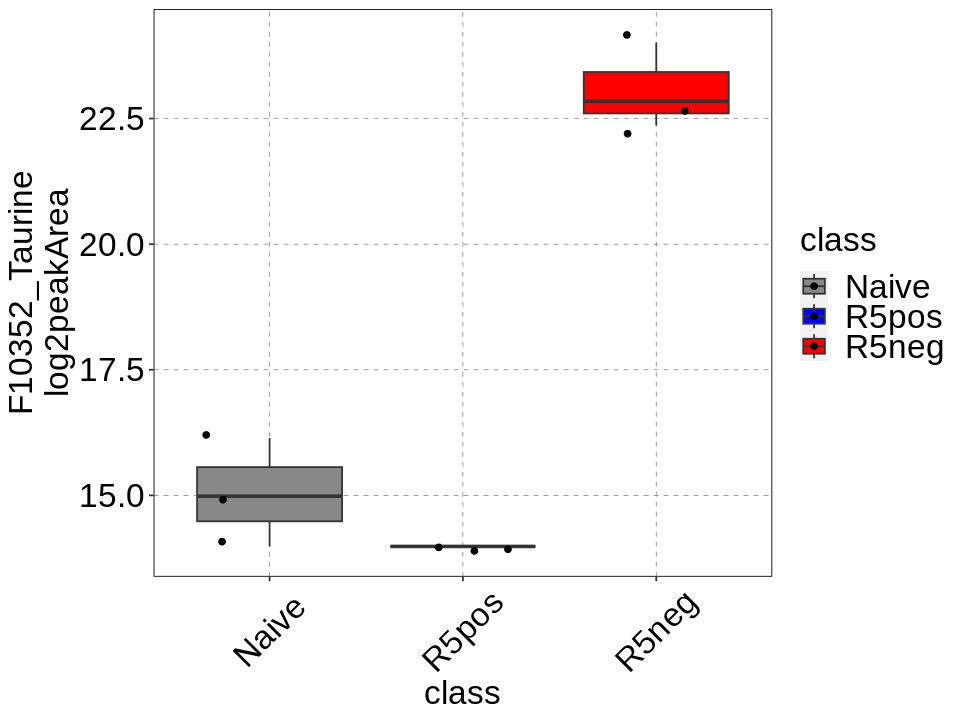

In [71]:
var <- sym('F10352')

metab_name <- lookUpAnnot(annot_df,var,'name_1st_guess')
box_plot(long_df = merged_df,
            x = 'class',
            y = var,
            xlab = 'class',
            ylab = glue('{var}_{metab_name}\nlog2peakArea'),
            fill_color = 'class',
            fig_width = 8,
            fig_height = 6,
            text_size = 20,
            legend_size = 20,
            axis_title_size = 20,
            output_dir = output_dir,
            pdf_prefix = 'test')

# Wrapper for plotting out multiple

In [72]:
head(merged_df)

,class,biological_samples,cell_number,F10352,F10379,F10384,F10471,F10490,F10512,F10535,⋯,F9000,F9015,F904,F9168,F9252,F932,F9462,F9715,F9794,F9855
,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Naive_1,Naive,Yes,300,13.98416,18.69048,14.55111,14.03351,17.88225,19.09941,15.02527,⋯,18.67974,18.63175,17.59192,15.23290,18.37797,13.93476,20.42475,17.3289,18.43249,19.38377
Naive_2,Naive,Yes,300,16.14083,18.69048,15.55111,15.03351,17.88225,19.09941,15.02527,⋯,17.36875,19.03156,17.59192,15.23290,18.37797,13.93476,20.34785,16.3289,18.43249,19.38377
Naive_3,Naive,Yes,300,14.98416,18.69048,14.55111,14.03351,17.88225,19.09941,16.02527,⋯,17.66815,18.84144,18.59192,16.23290,18.37797,14.93476,20.38411,16.3289,18.43249,19.38377
R5neg_1,R5neg,Yes,655,22.84246,19.86774,18.20019,20.27248,19.20643,20.50931,19.04663,⋯,21.08514,23.76851,20.11987,20.74022,19.37797,18.68335,23.72666,16.3289,19.76047,20.94435
R5neg_2,R5neg,Yes,687,22.36092,19.97306,20.09491,19.89541,18.88225,20.09941,18.61711,⋯,21.00026,23.63459,19.85725,20.92771,19.66789,19.27974,24.54404,16.3289,19.43249,20.38377
R5neg_3,R5neg,Yes,865,24.01059,19.69048,19.92981,19.49115,19.48695,20.25467,18.96478,⋯,20.89911,22.09474,19.97710,21.58038,19.80375,17.59902,24.45400,16.3289,19.68812,20.60307


In [73]:
listOfFeatures = colnames(merged_df)[grepl('F[0-9]',colnames(merged_df))] # 

In [74]:
# install.packages("ggpubr")
library(ggpubr)

In [46]:
fig_l = list()
for (i in 1:length(listOfFeatures)) {

    pdf_prefix = paste('test',cutoff_column,threshold, sep = "_") # 

    featID <- listOfFeatures[[i]]
    metab_name <- lookUpAnnot(annot_df,sym(featID),'name_1st_guess')

    fig_l[[i]] <- box_plot(long_df = merged_df,
                            x = 'class', #
                            y = sym(featID),
                            xlab = 'class', # 
                            ylab = glue('{featID}_{metab_name}\nlog2peakArea'),
                            fill_color = 'class',
                            fig_width = 4,
                            fig_height = 4,
                            text_size = 8, # important in report multiple ones.
                            legend_size = 8,
                            axis_title_size = 6,
                            output_dir = NULL, # no need to define, this is for single plot
                            pdf_prefix = NULL, # no need to define, this is for single plot
                            show_plot = FALSE)
                    }
multi.page <- ggarrange(plotlist = fig_l,
                        nrow = 3, ncol = 2)
ggexport(multi.page, filename = file.path(output_dir, 
                                          paste0("ggplot_multi_ggplot_",
                                                 pdf_prefix,
                                                 ".pdf")))


# library(ggpubr)
# 
# my_comparisons = list( c("0.5", "1"), c("1", "2"), c("0.5", "2") )
# 
# ggboxplot(ToothGrowth, x = "dose", y = "len",
#           color = "dose", palette = "jco")+ 
#   stat_compare_means(comparisons = my_comparisons, label.y = c(29, 35, 40))+
#   stat_compare_means(label.y = 45)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'F17031_6-{[7,8,9,12,13,14,18,19,25,29-decahydroxy-24-(hydroxymethyl)-4,22,27-trioxo-3,23,26-trioxahexacyclo[13.10.3.1²,⁶.0⁵,¹⁰.0¹¹,²⁸.0¹⁶,²¹]nonacosa-5(10),6,8,11,13,15(28),16,18,20-nonaen-17-yl]oxy}-3,4,5-trihydroxyoxane-2-carboxylic acid' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'F17031_6-{[7,8,9,12,13,14,18,19,25,29-decahydroxy-24-(hydroxymethyl)-4,22,27-trioxo-3,23,26-trioxahexacyclo[13.10.3.1²,⁶.0⁵,¹⁰.0¹¹,²⁸.0¹⁶,²¹]nonacosa-5(10),6,8,11,13,15(28),16,18,20-nonaen-17-yl]oxy}-3,4,5-trihydroxyoxane-2-carboxylic acid' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'F17031_6-{[7,8,9,12,13,14,18,19,25,29-decahydroxy-24-(hydroxymethyl)-4,22,27-trioxo-3,23,26-trioxahexacyclo[13.10.

-------

-------

-------

# Plot only PS species

In [81]:
threshold = 0.05
merged_df <- transform_merge_data4violin(df = df,
                                         meta_df = meta_df,
                                         class_column = 'class',
                                         cutoff_column = 'padj', 
                                         threshold = threshold)

In [82]:
listOfFeatures2 = colnames(merged_df)[grepl('F[0-9]',colnames(merged_df))] # 

In [89]:
PS_features <- c()
PS_names <- c()
for (id in listOfFeatures2) {
  temp <- lookUpAnnot(annot_df, id, 'name_1st_guess')
  tryCatch({
    if (grepl("PS", temp)) {
      PS_features <- append(PS_features, id)
        PS_names  <- append(PS_names, temp)
    }
  }, error = function(e) {
    # handle the error
    message(paste("An error occurred while processing feature", id, "- skipping..."))
  })
}

An error occurred while processing feature F17492 - skipping...

An error occurred while processing feature F6589 - skipping...



In [90]:
PS_features

[1] "F16656" "F17366" "F17619" "F17620" "F17634" "F17635" "F17842" "F18899"

In [91]:
PS_names

[1] "PS(18:0/18:1(9Z))"                               
[2] "PS(18:0/22:6(4Z,7Z,10Z,13Z,16Z,19Z))"            
[3] "PS(18:0/22:6(4Z,7Z,10Z,13Z,16Z,19Z))"            
[4] "PS(20:3(8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))"
[5] "PS(18:0/22:6(4Z,7Z,10Z,13Z,16Z,19Z))"            
[6] "PS(20:3(8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))"
[7] "PS(20:3(8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))"
[8] "PS(18:0/18:1(9Z))"

In [93]:
fig_l = list()
for (i in 1:length(PS_features)) {

    pdf_prefix = paste('PS_species',cutoff_column,threshold, sep = "_") # 

    featID <- PS_features[[i]]
    metab_name <- lookUpAnnot(annot_df,sym(featID),'name_1st_guess')

    fig_l[[i]] <- box_plot(long_df = merged_df,
                            x = 'class', #
                            y = sym(featID),
                            xlab = 'class', # 
                            ylab = glue('{featID}_{metab_name}\nlog2peakArea'),
                            fill_color = 'class',
                            fig_width = 4,
                            fig_height = 4,
                            text_size = 8, # important in report multiple ones.
                            legend_size = 8,
                            axis_title_size = 6,
                            output_dir = NULL, # no need to define, this is for single plot
                            pdf_prefix = NULL, # no need to define, this is for single plot
                            show_plot = FALSE)
                    }
multi.page <- ggarrange(plotlist = fig_l,
                        nrow = 3, ncol = 2)
ggexport(multi.page, filename = file.path(output_dir, 
                                          paste0("ggplot_multi_ggplot_",
                                                 pdf_prefix,
                                                 ".pdf")))


file saved to ../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/boxplot//ggplot_multi_ggplot_PS_species_padj_0.05.pdf

